In [20]:
from datetime import datetime
from time import time
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import pickle
import sys

datain = []

In [21]:
try:
	datatab = ascii.read(r'C:\Users\HP\Desktop\Bonn\My Courses\Advanced Lab Course\S262 Interferometry\A5\A5\scans\stilldata_out.txt') 
except Exception as e:
	print(e)

In [54]:

coords = [SkyCoord(d[0]+" "+d[1],unit=(u.hourangle,u.deg))  for d in zip(datatab['col3'],datatab['col4'])]

fluxa = list(datatab['col5'])
fluxb = list(datatab['col8'])
I = list(datatab['col6'])
Q = list(datatab['col7'])
nr = list(datatab['col8'])
coordpair = zip(coords,nr)
loadpickle = 0

pfluxa =[list(f) for f in zip(fluxa,range(len(fluxa)))]
pfluxb =[ list(f) for f in zip(fluxb,range(len(fluxb)))]
pQ =[list(f) for f in  zip(Q,range(len(Q)))]
pI =[list(f) for f in  zip(I,range(len(I)))]

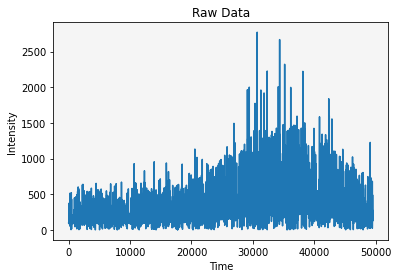

In [23]:

plt.plot(fluxa)
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Raw Data")
plt.show()

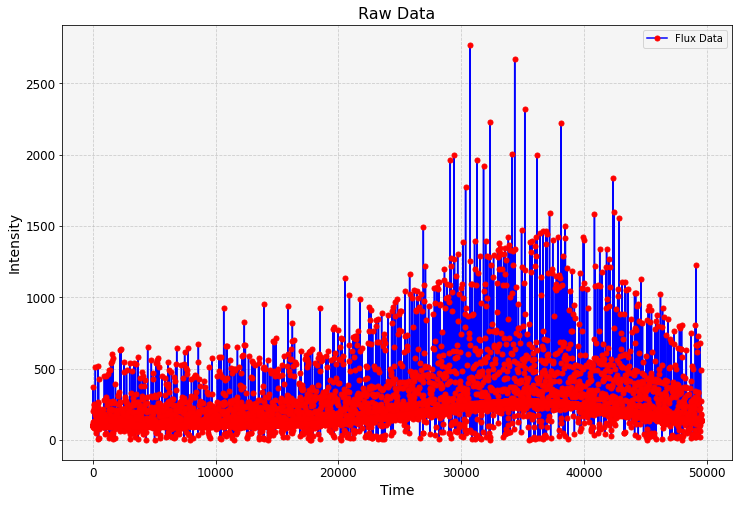

In [24]:

plt.figure(figsize=(12, 8))  
plt.rcParams['axes.facecolor'] = 'whitesmoke'  
plt.plot(fluxa, color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r', markeredgecolor='r', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()


plt.show()


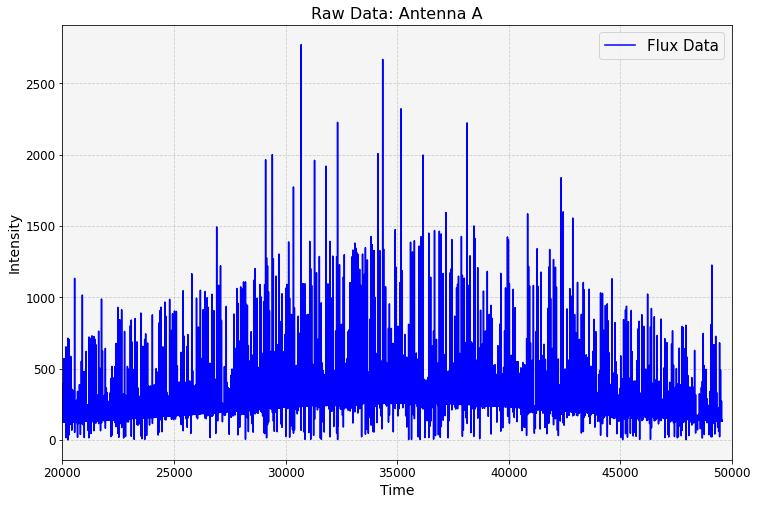

In [57]:

plt.figure(figsize=(12, 8)) 
plt.plot(fluxa, color='b', linestyle='-', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data: Antenna A", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize = 15)
plt.xlim(20000,50000)
plt.savefig('still raw a.pdf', format='pdf', bbox_inches='tight')

plt.show()


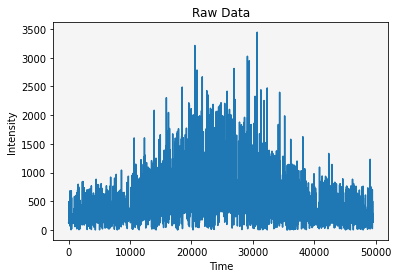

In [26]:
plt.plot(fluxb)
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.title("Raw Data")
plt.show()

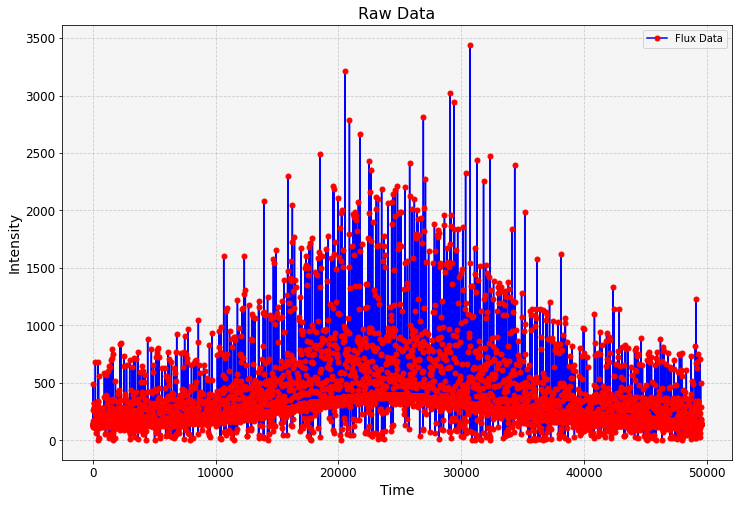

In [27]:
plt.figure(figsize=(12, 8))  
plt.rcParams['axes.facecolor'] = 'whitesmoke'  
plt.plot(fluxb, color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r', markeredgecolor='r', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()


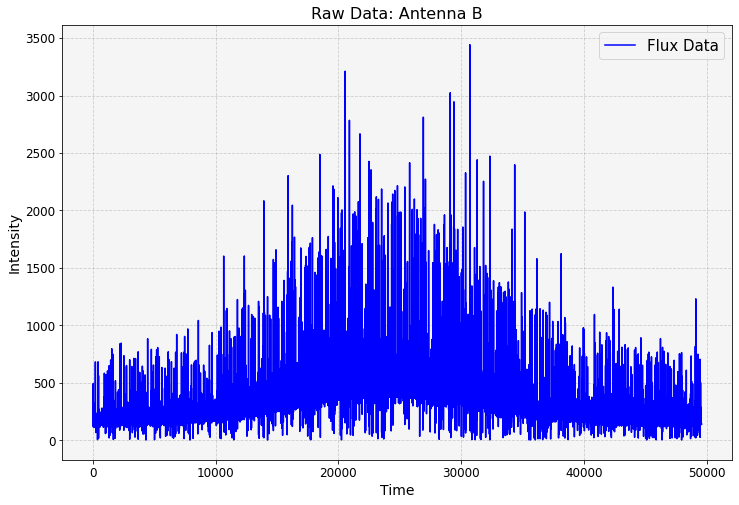

In [58]:

plt.figure(figsize=(12, 8))  
plt.plot(fluxb, color='b', linestyle='-', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data: Antenna B", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize = 15)
plt.savefig('still raw b.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [59]:

i=8
while i:
	ind = np.where(abs(fluxa - np.roll(fluxa,1**i)) > 60)[0]
	pfluxa = np.delete(pfluxa,ind,axis=0)
	fluxa = np.delete(fluxa,ind)
	print(len(ind))
	ind = np.where(abs(fluxb - np.roll(fluxb,1**i)) > 60)[0]
	pfluxb = np.delete(pfluxb,ind,axis=0)
	fluxb = np.delete(fluxb,ind)

	ind = np.where(abs(Q - np.roll(Q,1**i)) > 30)[0]
	pQ = np.delete(pQ,ind,axis=0)
	Q = np.delete(Q,ind)
	
	ind = np.where(abs(I - np.roll(I,1**i)) > 30)[0]
	pI = np.delete(pI,ind,axis=0)
	I = np.delete(I,ind)


	i-=1

3365
286
38
20
20
20
20
20


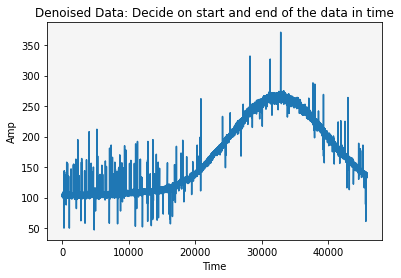

In [30]:

plt.plot(fluxa)
plt.title("Denoised Data: Decide on start and end of the data in time")
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()


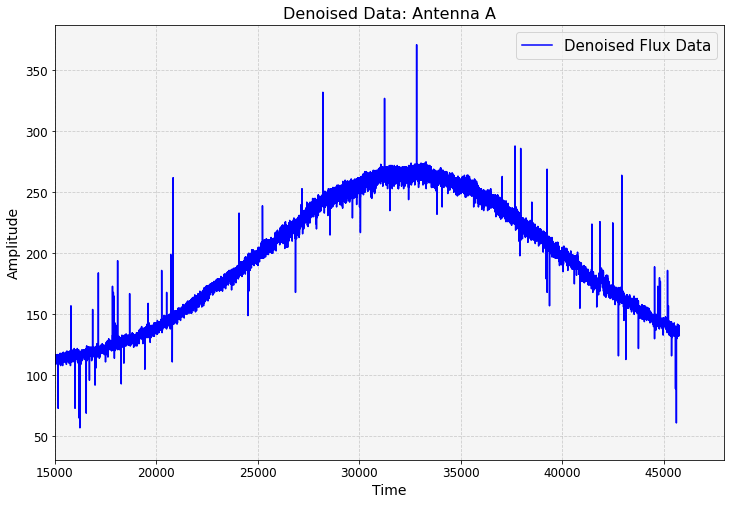

In [60]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxa, color='b', linestyle='-', label='Denoised Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Denoised Data: Antenna A", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(15000, 48000)

plt.legend(fontsize = 15)
plt.savefig('still denoised a.pdf', format='pdf', bbox_inches='tight')

plt.show()


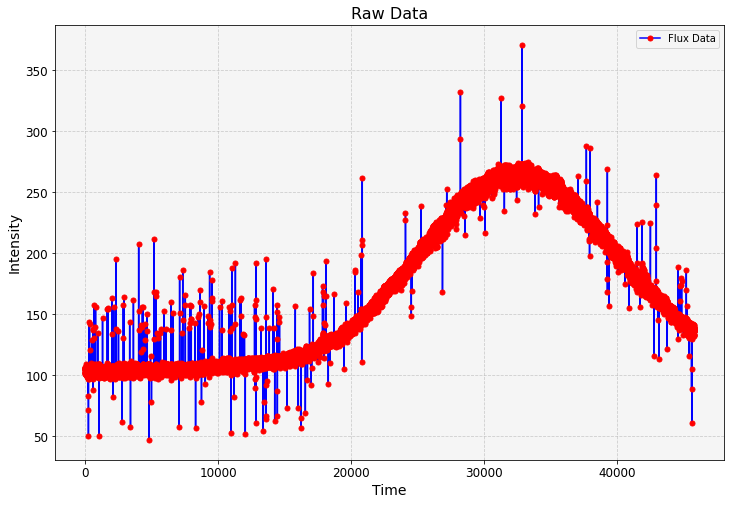

In [32]:
plt.figure(figsize=(12, 8))  
plt.rcParams['axes.facecolor'] = 'whitesmoke' 

plt.plot(fluxa, color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r', markeredgecolor='r', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Denoised Data: Antenna B", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.legend()


plt.show()


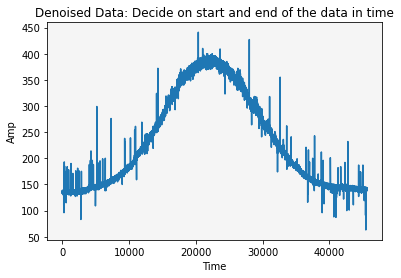

In [33]:
plt.plot(fluxb)
plt.title("Denoised Data: Decide on start and end of the data in time")
plt.xlabel("Time")
plt.ylabel("Amp")
plt.show()


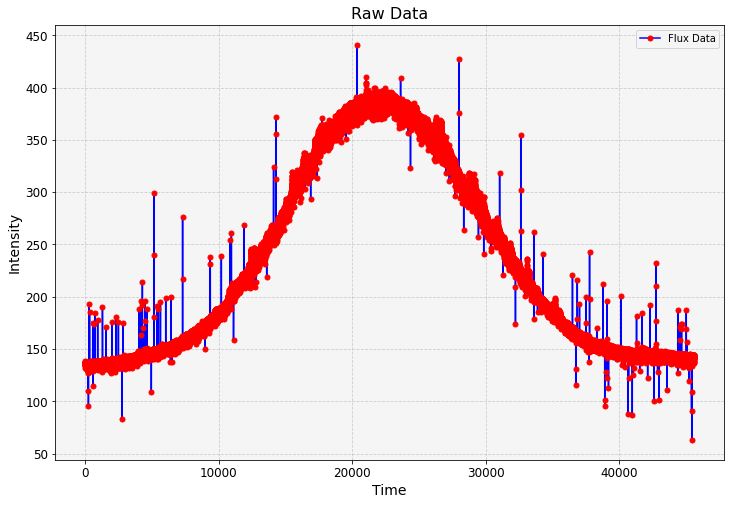

In [34]:
plt.figure(figsize=(12, 8))  
plt.rcParams['axes.facecolor'] = 'whitesmoke'  
plt.plot(fluxb, color='b', linestyle='-', marker='o', markersize=5, markerfacecolor='r', markeredgecolor='r', label='Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Intensity", fontsize=14)
plt.title("Raw Data", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend()

plt.show()


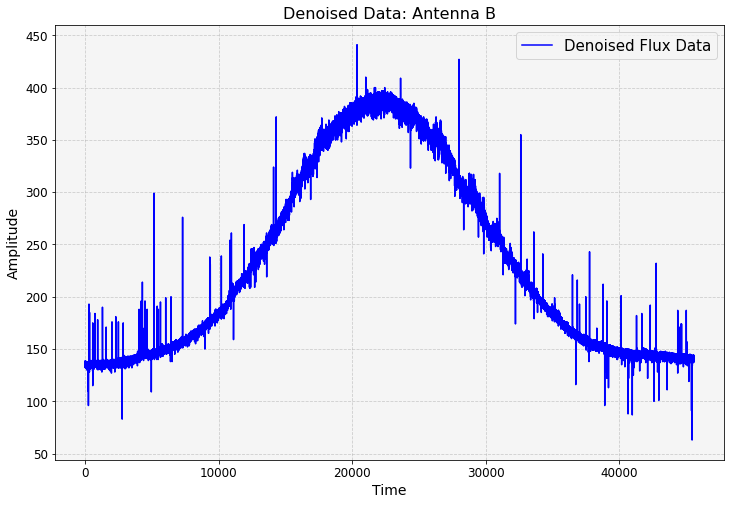

In [61]:
plt.figure(figsize=(12, 8))  
plt.plot(fluxb, color='b', linestyle='-', label='Denoised Flux Data')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.title("Denoised Data: Antenna B", fontsize=16)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize = 15)
plt.savefig('still denoised b.pdf', format='pdf', bbox_inches='tight')

plt.show()
